<a href="https://colab.research.google.com/github/aniket17022004/EDA-assignment-work/blob/main/21BDS0350_DA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/smoking.csv'
df = pd.read_csv(url)

print(df.head())
print(df.info())
print(df.describe(include='all'))

df['gross_income'] = df['gross_income'].replace({',': ''}, regex=True)
df['gross_income'] = pd.to_numeric(df['gross_income'], errors='coerce')

# Check for missing values and drop duplicates if any
print(df.isnull().sum())
df.drop_duplicates(inplace=True)


   rownames  gender  age marital_status highest_qualification nationality  \
0         1    Male   38       Divorced      No Qualification     British   
1         2  Female   42         Single      No Qualification     British   
2         3    Male   40        Married                Degree     English   
3         4  Female   40        Married                Degree     English   
4         5  Female   39        Married          GCSE/O Level     British   

  ethnicity      gross_income     region smoke  amt_weekends  amt_weekdays  \
0     White    2,600 to 5,200  The North    No           NaN           NaN   
1     White       Under 2,600  The North   Yes          12.0          12.0   
2     White  28,600 to 36,400  The North    No           NaN           NaN   
3     White  10,400 to 15,600  The North    No           NaN           NaN   
4     White    2,600 to 5,200  The North    No           NaN           NaN   

      type  
0      NaN  
1  Packets  
2      NaN  
3      NaN  
4  

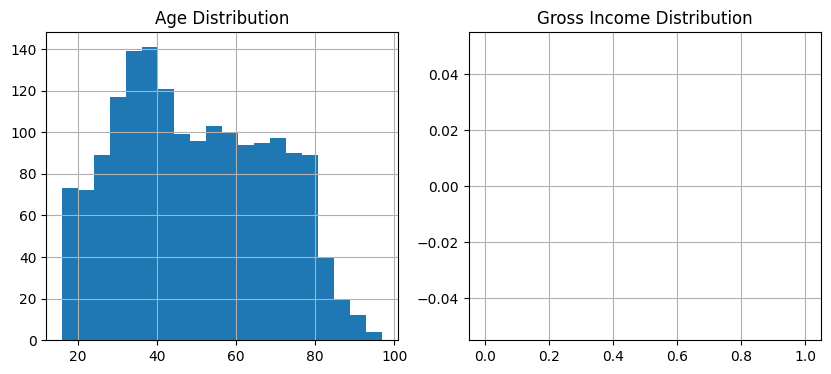

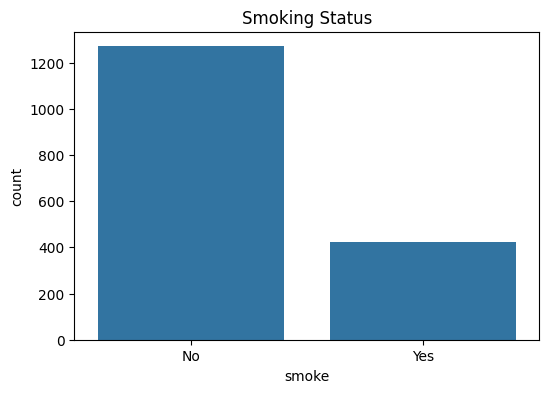

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
df['age'].hist(bins=20)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
df['gross_income'].dropna().hist(bins=20)
plt.title('Gross Income Distribution')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='smoke', data=df)
plt.title('Smoking Status')
plt.show()


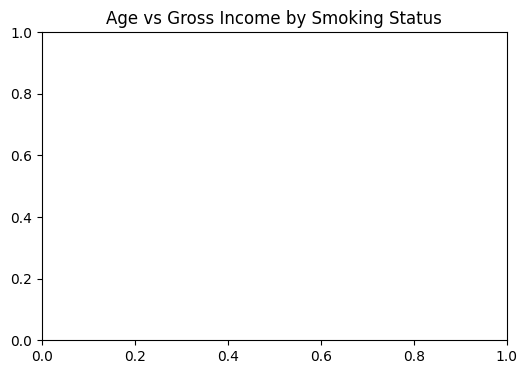

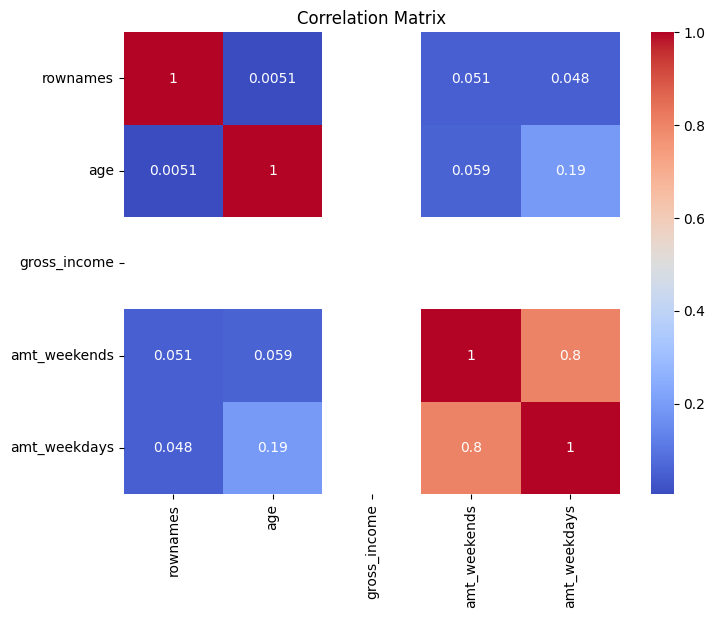

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='age', y='gross_income', hue='smoke', data=df)
plt.title('Age vs Gross Income by Smoking Status')
plt.show()

plt.figure(figsize=(8,6))
numeric_cols = df.select_dtypes(include=[np.number]).columns
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


After imputation (excluding gross_income):
 age             0
amt_weekends    0
amt_weekdays    0
dtype: int64


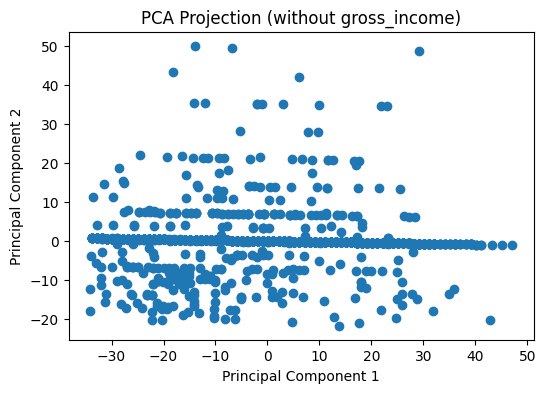

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Ensure amt_weekends and amt_weekdays are numeric
df['amt_weekends'] = pd.to_numeric(df['amt_weekends'], errors='coerce')
df['amt_weekdays'] = pd.to_numeric(df['amt_weekdays'], errors='coerce')

# Choose features excluding gross_income
features = ['age', 'amt_weekends', 'amt_weekdays']

# Fill missing values for these features using the mean (or median)
df_imputed = df[features].copy()
for col in features:
    df_imputed[col] = df_imputed[col].fillna(df_imputed[col].mean())

# Check if any NaNs remain
print("After imputation (excluding gross_income):\n", df_imputed.isnull().sum())

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_imputed)

# Plot the PCA projection
plt.figure(figsize=(6,4))
plt.scatter(pca_result[:, 0], pca_result[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Projection (without gross_income)')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

# Convert columns to numeric (gross_income will become NaN if not convertible)
df['gross_income'] = pd.to_numeric(df['gross_income'], errors='coerce')
df['amt_weekends'] = pd.to_numeric(df['amt_weekends'], errors='coerce')
df['amt_weekdays'] = pd.to_numeric(df['amt_weekdays'], errors='coerce')

# Encode the target variable 'smoke'
le = LabelEncoder()
df['smoke_enc'] = le.fit_transform(df['smoke'].astype(str))

# Since 'gross_income' has no valid values, drop it from features.
features = ['age', 'amt_weekends', 'amt_weekdays']

# Create a model DataFrame where smoke_enc is not missing
df_model = df[df['smoke_enc'].notnull()].copy()

# Use SimpleImputer to fill missing values with the median for the chosen features
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(df_model[features]), columns=features)
y = df_model['smoke_enc'].values

# Check the shape to confirm we have data
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train a logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Shape of X: (1691, 3)
Shape of y: (1691,)
Accuracy: 0.7964601769911505
Confusion Matrix:
 [[258   0]
 [ 69  12]]
Classification Report:
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       258
           1       1.00      0.15      0.26        81

    accuracy                           0.80       339
   macro avg       0.89      0.57      0.57       339
weighted avg       0.84      0.80      0.73       339

